In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from collections import defaultdict
import matplotlib.pyplot as plt

#Question 1
Consider the image of Fig.1 and apply unsharp masking and highboost filtering to enhance the
edges of the image. Vary the scaling factor from 2 to 4 for high-boost filtering. Consider a
row of the original image and plot the intensity values. This kind of plot is known as intensity
profile of that row. Plot similar intensity profiles (consider the same row) for the blurred image,
unsharp mask, sharpened image, and the high-boost filtered image. Explain your observation.

In [ ]:
###### creating new padded image after including padding in height and width
def padding(img, pad):
    h = img.shape[0]
    w = img.shape[1]
    padded_img = np.zeros((h+2*pad,w+2*pad))
    for i in range(h):
        for j in range(w):
            padded_img[i+pad,j+pad] = img[i,j]
    return padded_img

###### creating avg kernel of given size
def avgKernel(filter_size):
    avg_mask = np.array([[1/(filter_size**2)]*filter_size for _ in range(filter_size)])
    return avg_mask

###### generating guassian kernel using it's formula
def gaussianKernel(size):
    gaussian_filter = np.zeros((size,size))
    sigma = 1
    PI = math.pi
    for i in range(gaussian_filter.shape[0]):
        for j in range(gaussian_filter.shape[0]):
            gaussian_filter[i,j] = np.exp(-((i-4)**2 + (j-4)**2)/2*sigma**2)/2*PI*(sigma**2)
    return gaussian_filter

###### perofrming convolution
def convolution2d(img, kernel, pad):
    h = img.shape[0]
    w = img.shape[1]
    kernel_hw = kernel.shape[0]
    out = np.zeros((h-2*pad, w-2*pad))
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i][j] = np.sum(kernel*img[i:i+kernel_hw,j:j+kernel_hw])
    return out

def plt_intensity_profile(img , img_name, row_num=50):
  plt.figure();
  plt.bar(list(range(0,len(img[row_num]))), img[row_num])
  plt.xlabel('Intensity')
  plt.ylabel('Row Pixel')
  plt.title("Intensity Profile " + img_name)
  plt.show()



Lena Face Image


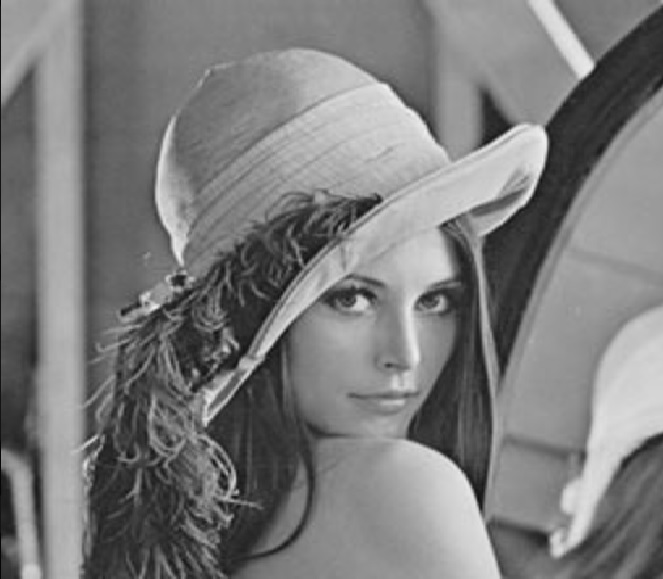



Blurred image


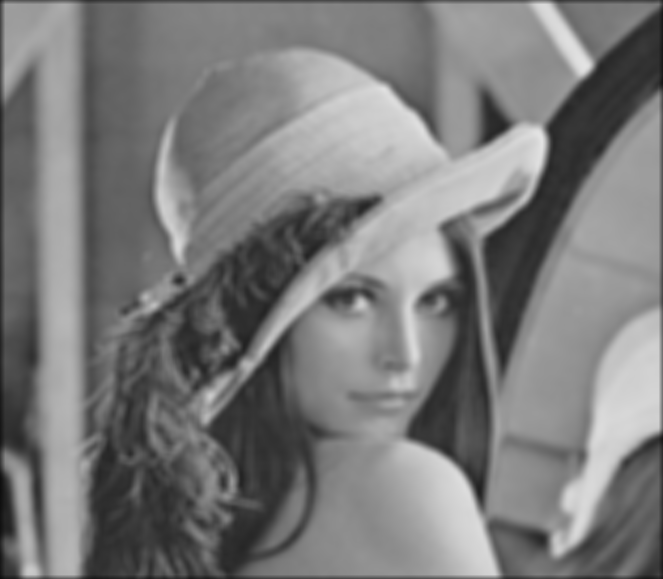

(579, 663)


Mask


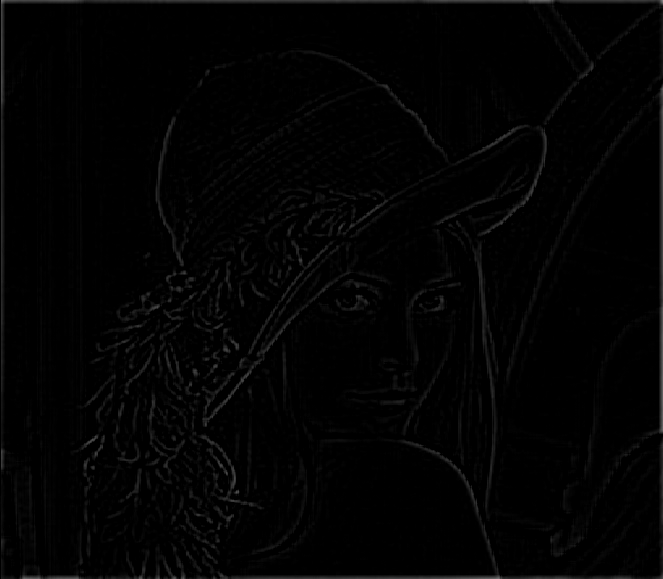



Image After unsharp masking


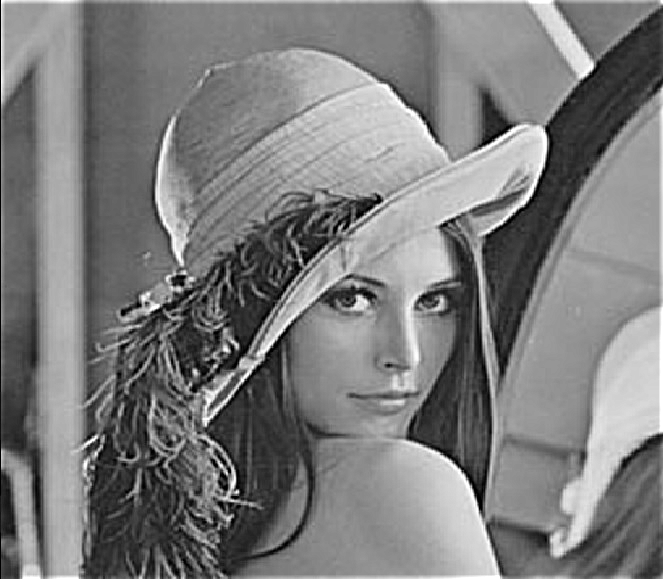



Image After High Boost Filtering (K=2)


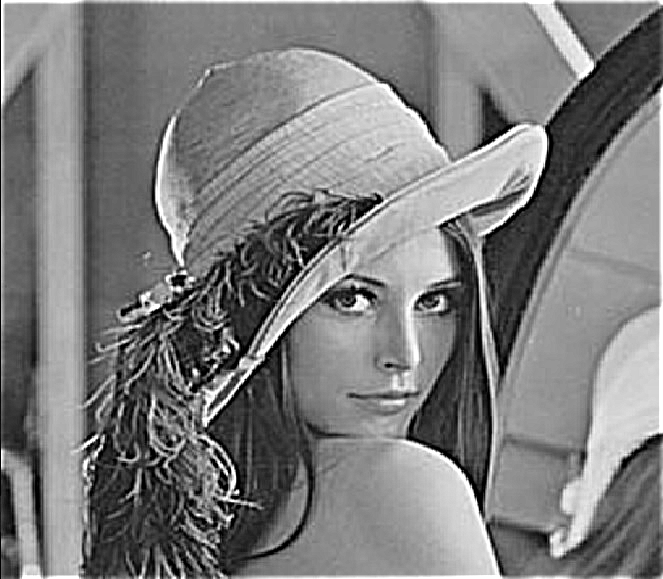



Image After High Boost Filtering (K=4)


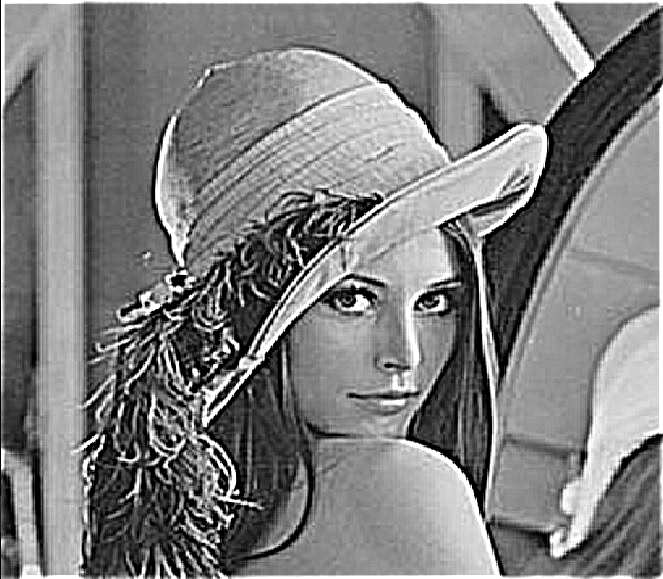



INTENSITY PROFILE PLOTS


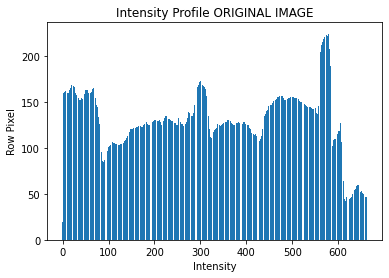

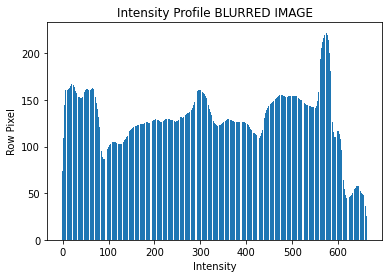

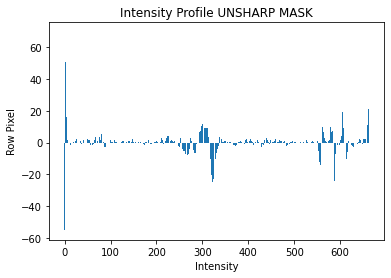

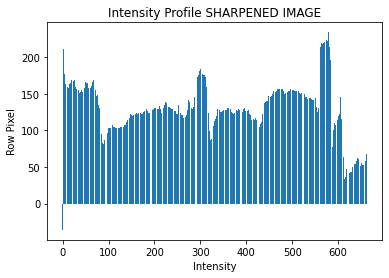

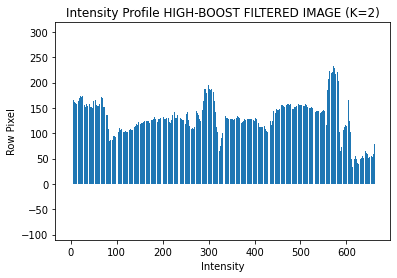

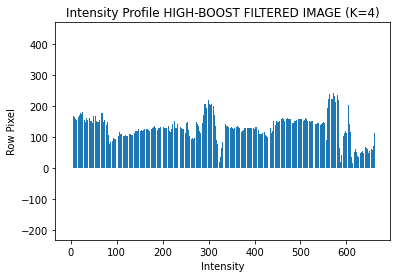

In [ ]:
Q1_img = cv2.imread('/content/drive/MyDrive/AIP/A4/lena_face.jpg',0)
print("Lena Face Image")
cv2_imshow(Q1_img)

print("\n\n=========================================================")

padded_lena = padding(Q1_img, 4)
#cv2_imshow(padded_lena)
#print(padded_lena.shape)

avg_mask = avgKernel(9)
blurred_img = convolution2d(padded_lena, avg_mask, 4)
print("Blurred image")
cv2_imshow(blurred_img)
print(blurred_img.shape)
print("\n\n=========================================================")

mask = Q1_img - blurred_img;
print("Mask")
cv2_imshow(mask)

#When k= 1 this is known as Unsharp masking. 
#For k>1 we call this as high-boost filtering because we are boosting the
# high-frequency components by giving more weight to the masked (edge) image.

print("\n\n=========================================================")

img_unsharp_masking = Q1_img + mask;
print("Image After unsharp masking")
cv2_imshow(img_unsharp_masking)

print("\n\n=========================================================")

img_high_boost_filtering_k_2 = Q1_img + 2*mask;
print("Image After High Boost Filtering (K=2)")
cv2_imshow(img_high_boost_filtering_k_2)

print("\n\n=========================================================")

img_high_boost_filtering_k_4 = Q1_img + 4*mask;
print("Image After High Boost Filtering (K=4)")
cv2_imshow(img_high_boost_filtering_k_4)

print("\n\n=========================================================")

print("INTENSITY PROFILE PLOTS");
#unsharp mask, sharpened image, and the high-boost filtered image

plt_intensity_profile(Q1_img, "ORIGINAL IMAGE")

print("\n\n=========================================================")

plt_intensity_profile(blurred_img, "BLURRED IMAGE")

print("\n\n=========================================================")
plt_intensity_profile(mask, "UNSHARP MASK")

print("\n\n=========================================================")
plt_intensity_profile(img_unsharp_masking, "SHARPENED IMAGE")

print("\n\n=========================================================")
plt_intensity_profile(img_high_boost_filtering_k_2, "HIGH-BOOST FILTERED IMAGE (K=2)")

print("\n\n=========================================================")
plt_intensity_profile(img_high_boost_filtering_k_4, "HIGH-BOOST FILTERED IMAGE (K=4)")

print("\n\n=========================================================")


#Question 2
Smooth the image of Fig.1 by using Biltaeral filtering. Compare the result with average filtering
and Gaussian smoothing (9 × 9 mask). Which result is better?–Explain your understanding.

Original Image


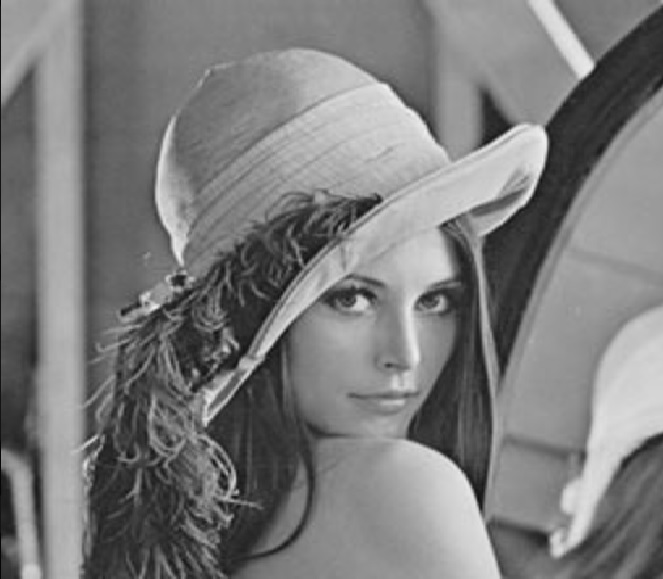



Image after Aaverage Filtering


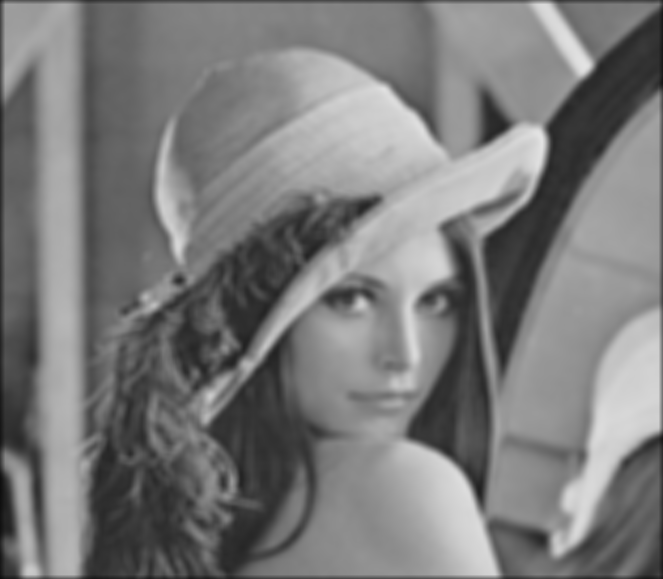



Image after Gaussian Smoothing 


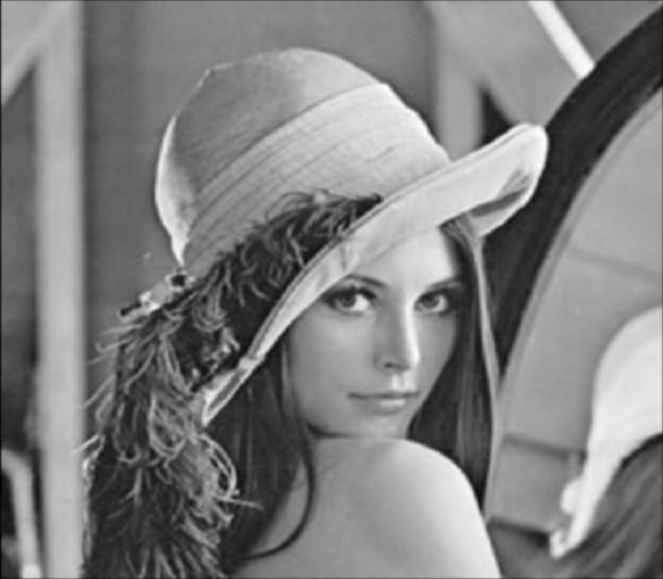



Image after Bilateral Filtering 


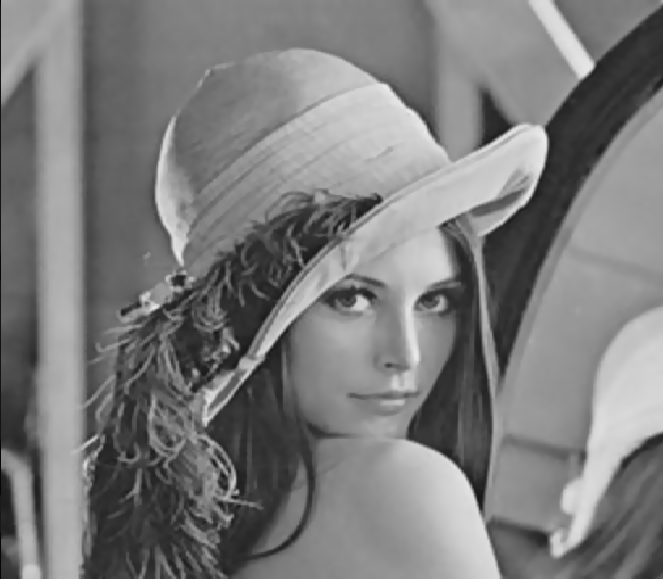

In [ ]:
lena_face = cv2.imread("/content/drive/MyDrive/AIP/A4/lena_face.jpg",0)
print("Original Image")
cv2_imshow(lena_face)
#print(lena_face.shape)

print("\n\n===================================================================")
padded_lena = padding(lena_face, 4)
#cv2_imshow(padded_lena)
#print(padded_lena.shape)

avg_mask = avgKernel(9)
conv_lena = convolution2d(padded_lena, avg_mask, 4)
print("Image after Aaverage Filtering")
cv2_imshow(conv_lena)
#print(conv_lena.shape)

print("\n\n===================================================================")

gaussian_filter = gaussianKernel(9)
weighted_lena = convolution2d(padded_lena, gaussian_filter, 4)
weighted_lena = weighted_lena - np.min(weighted_lena)
weighted_lena = weighted_lena/np.max(weighted_lena)
weighted_lena *= 255
print("Image after Gaussian Smoothing ")
cv2_imshow(weighted_lena)
#print(weighted_lena.shape)

print("\n\n===================================================================")

#Reference - https://www.geeksforgeeks.org/python-bilateral-filtering/
# Apply bilateral filter with d = 9,
# sigmaColor = 7;  sigmaSpace = 9.
bilateral_lena = cv2.bilateralFilter(lena_face, 9, 7, 9)
print("Image after Bilateral Filtering ")
cv2_imshow(bilateral_lena)
#print(bilateral_lena.shape)

#Question 3
Consider the image of Fig.2 and process it to bring out more skeletal detail. (You may use
combination of sharpening and smoothing operations).

In [ ]:
def laplacian_1(filter_size):
    mask = np.array([[-1]*filter_size for _ in range(filter_size)])
    mask[filter_size//2][filter_size//2] = filter_size*filter_size -1;
    return mask

def sobel_operators(filter_size=3):
    mask1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    mask2 = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])
    return mask1, mask1.T  , mask2    

Original SKELETON Image


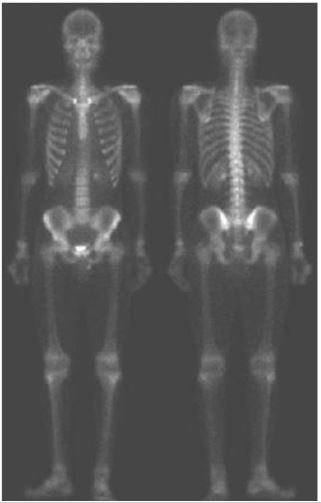




Step 1. Applying laplacian filter on original image
Laplacian Filter : 
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Image after laplacian image


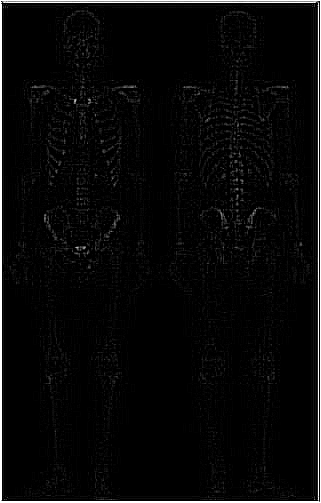

(503, 321)



Step 2. Adding laplacian filtered image and original image
Added Image 


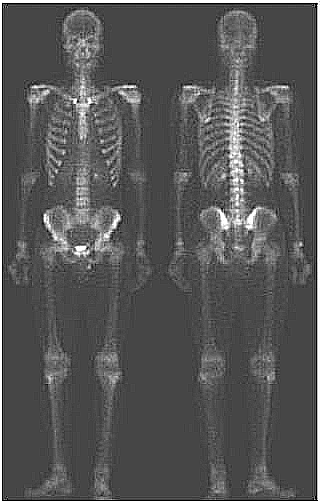

In [ ]:
skeleton = cv2.imread("/content/drive/MyDrive/AIP/A4/skeleton.JPG",0)
print("Original SKELETON Image")
cv2_imshow(skeleton)

print("\n\n=================================================================")
print("\nStep 1. Applying laplacian filter on original image")
laplacian_filter = laplacian_1(3);
print("Laplacian Filter : \n",laplacian_filter );

padded_skeleton = padding(skeleton, 1)
#cv2_imshow(padded_skeleton)
#print(padded_skeleton.shape)

laplacian_filter_skeleton = convolution2d(padded_skeleton, laplacian_filter, 1)
print("Image after laplacian image")
cv2_imshow(laplacian_filter_skeleton)
print(laplacian_filter_skeleton.shape)


print("\n\n=================================================================")
print("\nStep 2. Adding laplacian filtered image and original image")
added_laplacian_and_skeleton= laplacian_filter_skeleton +  skeleton;
print("Added Image ");
cv2_imshow(added_laplacian_and_skeleton );




Step 3. Applying sobel operator on original image
sobel_filter_1 : 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
sobel_filter_2 : 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
sobel_filter_3 : 
 [[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]]

Image after  applying sobel_filter_1 


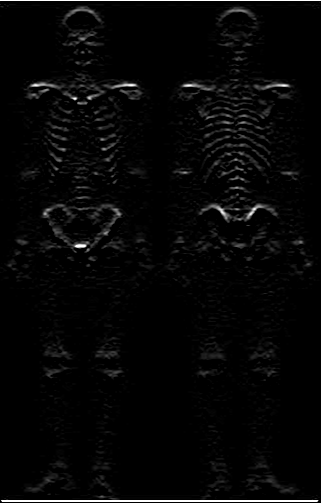


Image after  applying sobel_filter_2 


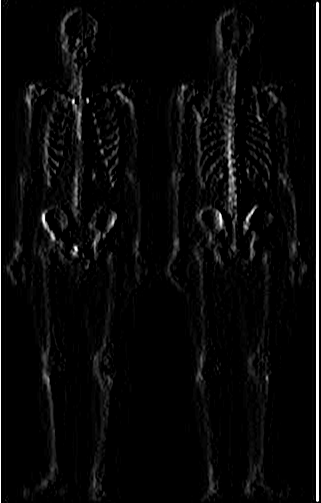


Image after  applying sobel_filter_3 


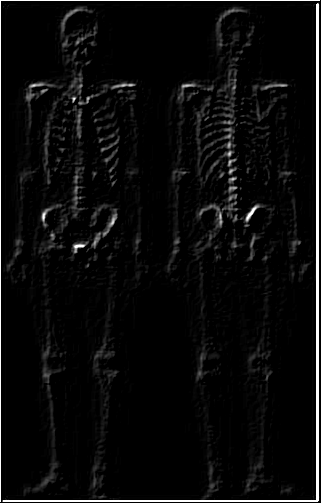


Image after adding all sobel filtered images 


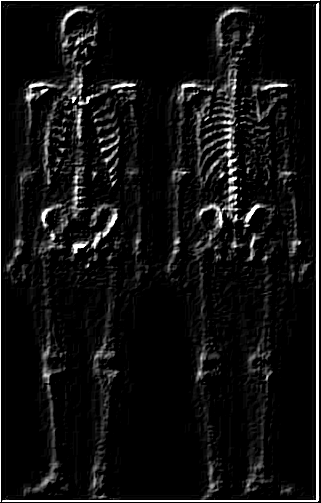




Step 4. Applying averaging filter (5X5)  on sobel filtered image
Smoothened_sobel_filtered_img


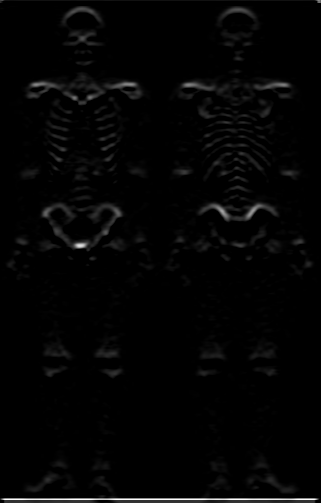

In [ ]:
# (a) Image of whole body bone scan.
# (b) Laplacian of (a). 
# (c) Sharpened image obtained by adding (a) and (b). 


# (d) Sobel of (a)
# (e) Sobel image smoothed with a  5*5 averaging filter. 
# (f) Mask image formed by the product of (c) and (e).
# (g) Sharpened image obtained by the sum of (a) and (f). 
# (h) Final result obtained by applying a power-law transformation to(g). 



print("\n\n=================================================================")
print("\nStep 3. Applying sobel operator on original image")
sobel_filter_1, sobel_filter_2 ,sobel_filter_3  = sobel_operators();
print("sobel_filter_1 : \n",sobel_filter_1 );
print("sobel_filter_2 : \n",sobel_filter_2 );
print("sobel_filter_3 : \n",sobel_filter_3 );


padded_skeleton = padding(skeleton, 1)
#cv2_imshow(padded_skeleton)
#print(padded_skeleton.shape)

sobel_filter_1_skeleton = convolution2d(padded_skeleton, sobel_filter_1, 1)
sobel_filter_2_skeleton = convolution2d(padded_skeleton, sobel_filter_2, 1)
sobel_filter_3_skeleton = convolution2d(padded_skeleton, sobel_filter_3, 1)

print("\nImage after  applying sobel_filter_1 ")
cv2_imshow(sobel_filter_1_skeleton)
#print(sobel_filter_1_skeleton.shape)

print("\nImage after  applying sobel_filter_2 ")
cv2_imshow(sobel_filter_2_skeleton)
#print(sobel_filter_2_skeleton.shape)


print("\nImage after  applying sobel_filter_3 ")
cv2_imshow(sobel_filter_3_skeleton)
#print(sobel_filter_3_skeleton.shape)

added_sobel_filtered_images = sobel_filter_1_skeleton+ sobel_filter_2_skeleton+sobel_filter_3_skeleton
print("\nImage after adding all sobel filtered images ")
cv2_imshow(added_sobel_filtered_images)
#print(added_sobel_filtered_images.shape)

print("\n\n=================================================================")
print("\nStep 4. Applying averaging filter (5X5)  on sobel filtered image")
"""
padded_sobel_filtered_img = padding(added_sobel_filtered_images, 2)
avg_mask_for_sobel = avgKernel(5)
smoothened_sobel_filtered_img = convolution2d(padded_sobel_filtered_img, avg_mask_for_sobel, 2)
print("Smoothened_sobel_filtered_img")
cv2_imshow(smoothened_sobel_filtered_img)

"""

padded_sobel_filtered_img = padding(sobel_filter_1_skeleton, 2)
avg_mask_for_sobel = avgKernel(5)
smoothened_sobel_filtered_img = convolution2d(padded_sobel_filtered_img, avg_mask_for_sobel, 2)
print("Smoothened_sobel_filtered_img")
cv2_imshow(smoothened_sobel_filtered_img)



In [ ]:
#sobel_filter_1_skeleton

In [ ]:
#smoothened_sobel_filtered_img




Step ADDITIONAL. Unsharp mask on sobel image
sobel_mask


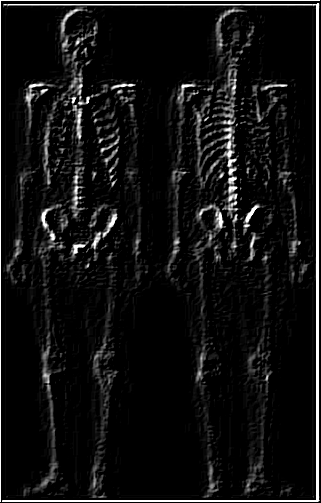




Step 5. Mask image formed by the ADDITION (NOT product) of laplacian filtered image and smoothened sobel image.
prod_laplacian_sobel


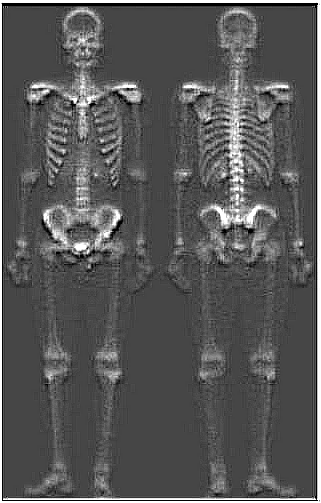




Step 6.  Sharpened image obtained by the sum of mask and original image 
sharpened_img


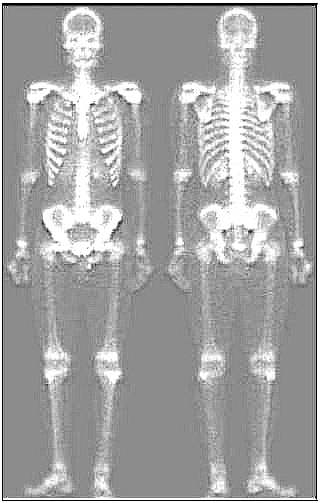




Step 7.  Power law transformation 
Gamma transformed Image


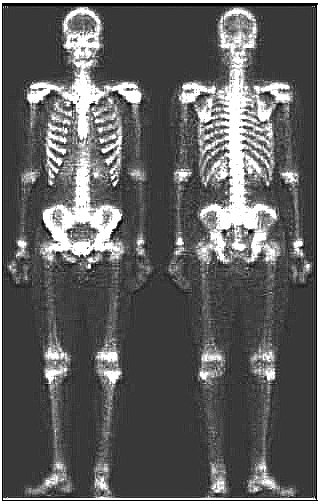

In [ ]:
print("\n\n=================================================================")
print("\nStep ADDITIONAL. Unsharp mask on sobel image")

sobel_mask = added_sobel_filtered_images -smoothened_sobel_filtered_img ;

print("sobel_mask")
cv2_imshow(sobel_mask)

print("\n\n=================================================================")
print("\nStep 5. Mask image formed by the ADDITION (NOT product) of laplacian filtered image and smoothened sobel image.")
prod_laplacian_sobel =cv2.add(added_laplacian_and_skeleton ,smoothened_sobel_filtered_img);


#prod_laplacian_sobel =cv2.multiply(added_laplacian_and_skeleton ,smoothened_sobel_filtered_img);
print("prod_laplacian_sobel")
cv2_imshow(prod_laplacian_sobel)

print("\n\n=================================================================")

print("\nStep 6.  Sharpened image obtained by the sum of mask and original image ")

sharpened_img =skeleton + prod_laplacian_sobel;
print("sharpened_img")
cv2_imshow(sharpened_img)

type(skeleton), skeleton.shape , type(prod_laplacian_sobel), prod_laplacian_sobel.shape 


print("\n\n=================================================================")
print("\nStep 7.  Power law transformation ")

gamma=2.5
image1_g = ((sharpened_img/255)**(gamma))*255

print("Gamma transformed Image")
cv2_imshow(image1_g)




Step ADDITIONAL. Unsharp mask on sobel image
sobel_mask


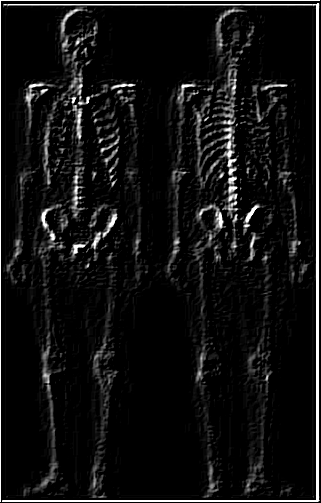




Step 5. Mask image formed by the product of laplacian filtered image and smoothened sobel image.
prod_laplacian_sobel


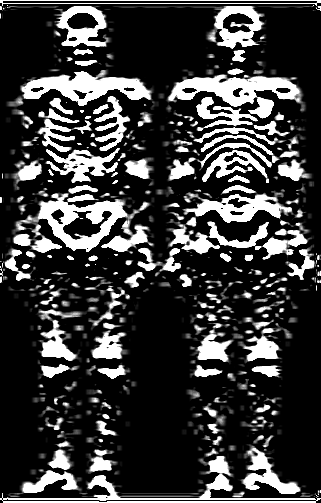




Step 6.  Sharpened image obtained by the sum of mask and original image 
sharpened_img


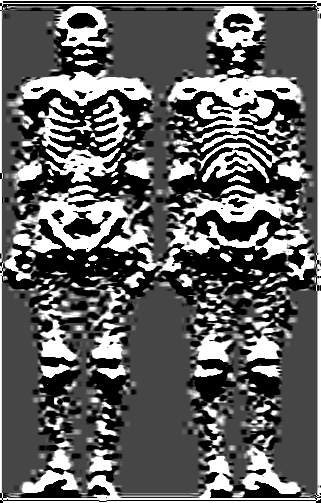




Step 7.  Power law transformation 
Gamma transformed Image


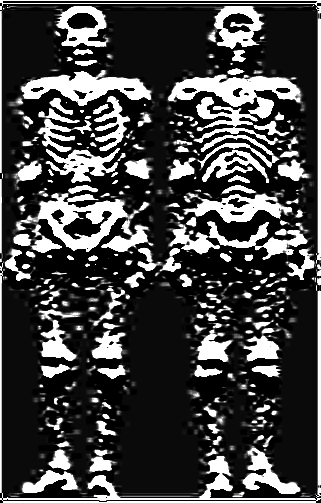

In [ ]:
print("\n\n=================================================================")
print("\nStep ADDITIONAL. Unsharp mask on sobel image")

sobel_mask = added_sobel_filtered_images -smoothened_sobel_filtered_img ;

print("sobel_mask")
cv2_imshow(sobel_mask)

print("\n\n=================================================================")
print("\nStep 5. Mask image formed by the product of laplacian filtered image and smoothened sobel image.")


prod_laplacian_sobel =cv2.multiply(added_laplacian_and_skeleton ,smoothened_sobel_filtered_img);
print("prod_laplacian_sobel")
cv2_imshow(prod_laplacian_sobel)

print("\n\n=================================================================")

print("\nStep 6.  Sharpened image obtained by the sum of mask and original image ")

sharpened_img =skeleton + prod_laplacian_sobel;
print("sharpened_img")
cv2_imshow(sharpened_img)

type(skeleton), skeleton.shape , type(prod_laplacian_sobel), prod_laplacian_sobel.shape 


print("\n\n=================================================================")
print("\nStep 7.  Power law transformation ")

gamma=2.5
image1_g = ((sharpened_img/255)**(gamma))*255

print("Gamma transformed Image")
cv2_imshow(image1_g)

#Question 4

Generate a 1D rectangular pulse rec(t) in time domain, perform the following operation on the pulse:

• Plot rec(t).

• Write a code to transform the signal into frequency domain.

• Plot the magnitude (magnitude spectrum).

• Vary the length of the rectangular pulse and observe the magnitude spectrum for each case.

• Write a code to perform inverse transformation from frequency domain to time domain with all the frequency components.

• Instead of using all frequency-components to reconstruct the time-domain signal, select a range of low-frequency components to reconstruct the time-domain signal. (Use a low pass filter with a specified bandwidth)

• Compare the two reconstructed time-domain signals using all frequency-domain components and partial frequency-domain components, respectively. What are the differences?

• Vary the bandwidth of the low pass filter for reconstruction, and observe the changes.

GENERATED PULSE (Length - 50)


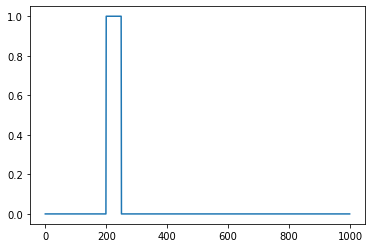


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 50)


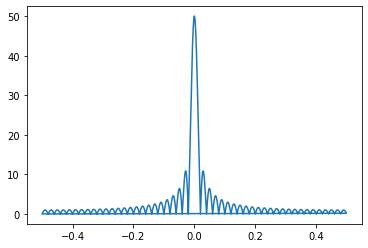



GENERATED PULSE (Length - 100)


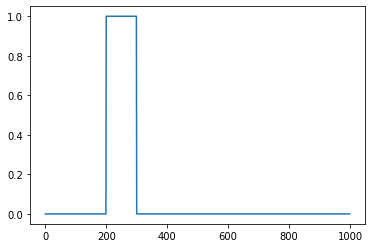


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)


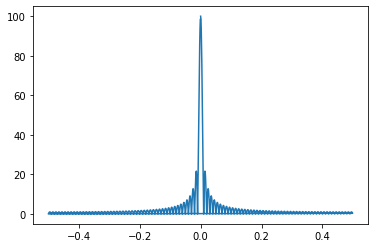



GENERATED PULSE (Length - 200)


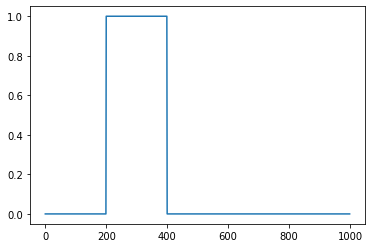


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 200)


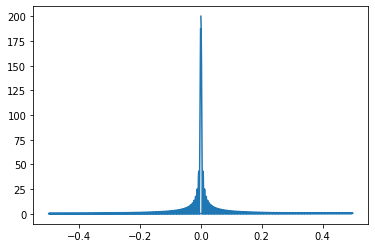



GENERATED PULSE (Length - 400)


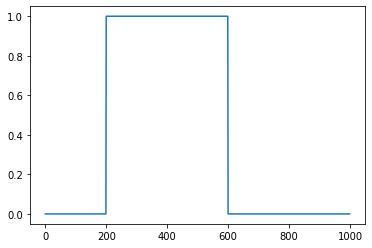


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 400)


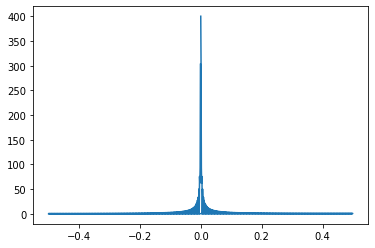

In [ ]:
#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:250] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 50)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

from scipy.fft import fft, fftfreq

yf = fft(a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 50)")
plt.plot(xf,np.abs( yf))
plt.show()

print("\n==========================================================")
print("\n==========================================================")


#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:300] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 100)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

from scipy.fft import fft, fftfreq

yf = fft(a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)")
plt.plot(xf,np.abs( yf))
plt.show()

print("\n==========================================================")
print("\n==========================================================")


#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:400] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 200)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

from scipy.fft import fft, fftfreq

yf = fft(a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 200)")
plt.plot(xf,np.abs( yf))
plt.show()


print("\n==========================================================")
print("\n==========================================================")

#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:600] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 400)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

from scipy.fft import fft, fftfreq

yf = fft(a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 400)")
plt.plot(xf,np.abs( yf))
plt.show()

print("\n==========================================================")
print("\n==========================================================")



https://realpython.com/python-scipy-fft/

GENERATED PULSE (Length - 100)


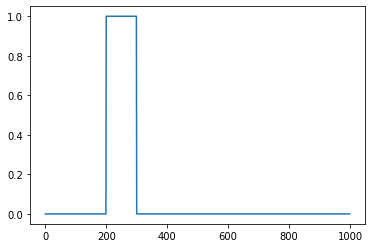


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)


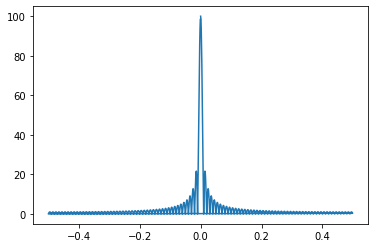


INVERSE FOURIER TRANSFORM (Length = 100) (with all frequency components)


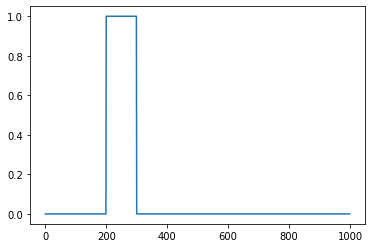


LOW PASS FILTERING
INVERSE FOURIER TRANSFORM of PULSE (Length = 100) (with low frequency components)


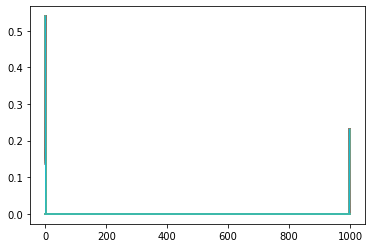

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:300] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 100)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

from scipy.fft import fft, fftfreq, ifft

yf = fft(a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)")
plt.plot(xf,np.abs( yf))
plt.show()

print("\n==========================================================")

print("INVERSE FOURIER TRANSFORM (Length = 100) (with all frequency components)")

x_from_ifft = ifft(yf);

#print("")
import matplotlib.pyplot as plt
plt.plot(x_from_ifft)
plt.show()
print("\n==========================================================")

print("LOW PASS FILTERING")
r = 50 # how narrower the window is
ham = np.hamming(1000)[:,None] # 1D hamming
#ham2d = np.sqrt(np.dot(ham, ham.T)) ** r # expand to 2D hamming

#f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
#f_shifted = np.fft.fftshift(a)
#f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = ham * yf

f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)

print("INVERSE FOURIER TRANSFORM of PULSE (Length = 100) (with low frequency components)")

import matplotlib.pyplot as plt
plt.plot(filtered_img)
plt.show()

"""
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
"""


print("\n==========================================================")

LOW PASS FILTERING
(1000, 1)
(1000, 1)
[[ 5.9604645e-08]
 [ 3.0901691e-01]
 [-3.0708146e-01]
 [-5.8044493e-01]
 [-5.8778518e-01]
 [-8.0901694e-01]
 [ 7.9390931e-01]
 [ 9.2744923e-01]
 [ 9.5105678e-01]
 [ 9.9999994e-01]]
INVERSE FOURIER TRANSFORM (with low frequency components)


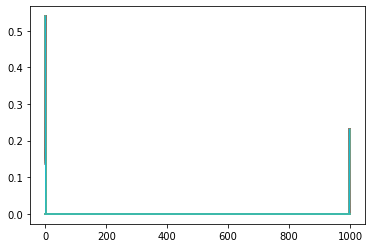

'\nfiltered_img -= filtered_img.min()\nfiltered_img = filtered_img*255 / filtered_img.max()\nfiltered_img = filtered_img.astype(np.uint8)\n'

In [ ]:
import cv2
print("LOW PASS FILTERING")
r = 50 # how narrower the window is
ham = np.hamming(1000)[:,None] # 1D hamming

#print(ham)
#f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
X1=cv2.dft(a.astype(np.float32));
print(X1.shape)
f_shifted = np.fft.fftshift(X1)
print(f_shifted.shape)
print(f_shifted[0:10])
#f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = ham * yf

f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)

print("INVERSE FOURIER TRANSFORM (with low frequency components)")

import matplotlib.pyplot as plt
plt.plot(filtered_img)
plt.show()

"""
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
"""


In [ ]:
import math
def glp(im,thresh):

  # % inputs
  # % im is the fourier transform of the image
  # % thresh is the cutoff circle radius

  # %outputs
  # % res is the filtered image

  r=im.shape[0];
  d0=thresh;

  d=np.zeros(r);#,c);
  h=np.zeros(r);#,c);
  res=np.zeros(r);

  for i in range (0,r):
    d[i]=  math.sqrt( (i-(r/2))**2)# + (j-(c/2))^2);

    #print(d[i])
  #print(len(d))    

  for i in range (0,r):
    h[i]= math.exp ( -( (d[i]**2)/(2*(d0**2)) ) );

    #print(h[i])
   

  for i in range (0,r):
    res[i]=h[i]*im[i];

  return res


GENERATED PULSE (Length - 100)


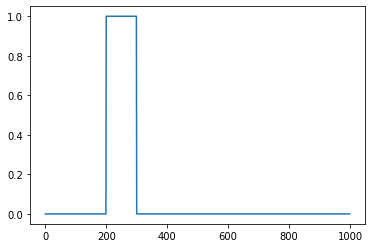


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)


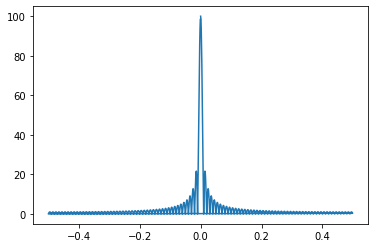


INVERSE FOURIER TRANSFORM (with all frequency components)


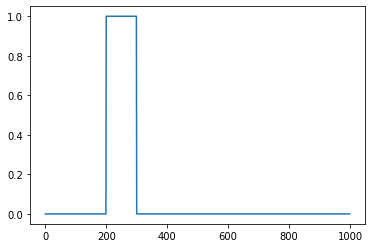


INVERSE FOURIER TRANSFORM (with few components)


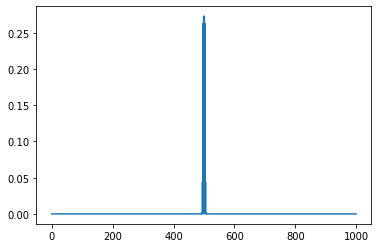

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:300] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 100)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

from scipy.fft import fft, fftfreq, ifft

yf = fft(a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)")
plt.plot(xf,np.abs( yf))
plt.show()

print("\n==========================================================")

print("INVERSE FOURIER TRANSFORM (with all frequency components)")

x_from_ifft = ifft(yf);

#print("")
import matplotlib.pyplot as plt
plt.plot(x_from_ifft)
plt.show()
print("\n==========================================================")


low_pass=glp( yf,2)

#print(low_pass)

print("INVERSE FOURIER TRANSFORM (with few components)")

x_from_ifft2 = ifft(low_pass);

#print("")
import matplotlib.pyplot as plt
#plt.plot(x_from_ifft2)
plt.plot(np.abs(low_pass))
plt.show()
print("\n==========================================================")


GENERATED PULSE (Length - 100)


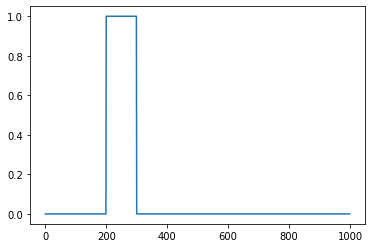


MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)


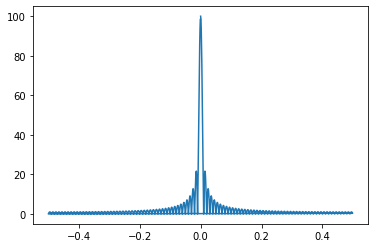


INVERSE FOURIER TRANSFORM (with few components)


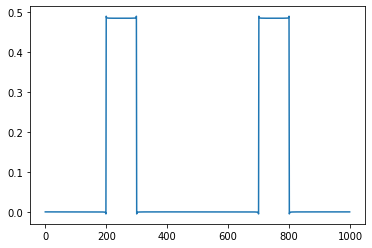

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Pulse generation
import numpy as np
a = np.zeros( (1000,) )   
a[200:300] = 1.0  


#Plotting the generated pulse
print("GENERATED PULSE (Length - 100)")
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()
shifted_a = np.fft.fftshift(a)
from scipy.fft import fft, fftfreq, ifft

yf = fft(shifted_a)
#print(yf)

xf = fftfreq(1000)
#print(xf)
print("\n==========================================================")
print("MAGNITUDE SPECTRUM OF FOURIER TRANSFORM OF GENERATED PULSE (Length - 100)")
plt.plot(xf,np.abs( yf))
plt.show()

print("\n==========================================================")

# print("INVERSE FOURIER TRANSFORM (with all frequency components)")

# x_from_ifft = ifft(yf);

# #print("")
# import matplotlib.pyplot as plt
# plt.plot(x_from_ifft)
# plt.show()
# print("\n==========================================================")


low_pass=glp( yf,2000)

#print(low_pass)

print("INVERSE FOURIER TRANSFORM (with few components)")

x_from_ifft2 = ifft(low_pass);

shifted_x_from_ifft2 = np.fft.fftshift(x_from_ifft2)

#print("")
import matplotlib.pyplot as plt
#plt.plot(x_from_ifft2)
plt.plot(shifted_x_from_ifft2)
plt.show()
print("\n==========================================================")
